# Funciones de Nivel Inferior

Las funciones que hemos utilizado hasta el momento, como `relplot()`, `displot()`, y `catplot()`, son consideradas como **funciones de alto nivel**, porque ofrecen una forma rápida y sencilla de crear gráficos comunes con una sola llamada de función.

En esta lección vamos a conocer las **funciones de nivel inferior**, que son más complejas de construir, pero que te dan un control más detallado sobre la estética y la disposición de los gráficos.

El uso de estas herramientas de nivel inferior es más manual y requiere un entendimiento más profundo de Seaborn y de Matplotlib (que es la biblioteca sobre la cual Seaborn está construida), pero eso por supuesto no nos va a detener, porque tu y yo somos capaces de comprender cosas complejas, siempre que vayamos paso a paso.

Primero que nada, vamos a llamar a nuestros queridos pingüinos.

In [1]:
import seaborn as sns

In [2]:
pinguinos = sns.load_dataset("penguins")

Para representar la relaciones de este dataset te voy a presentar una función de nivel inferior llamada `PairGrid()`. En ella solo voy a especificar el dataset que quiero utilizar, y en qué quiero basar los diferentes colores del gráfico.

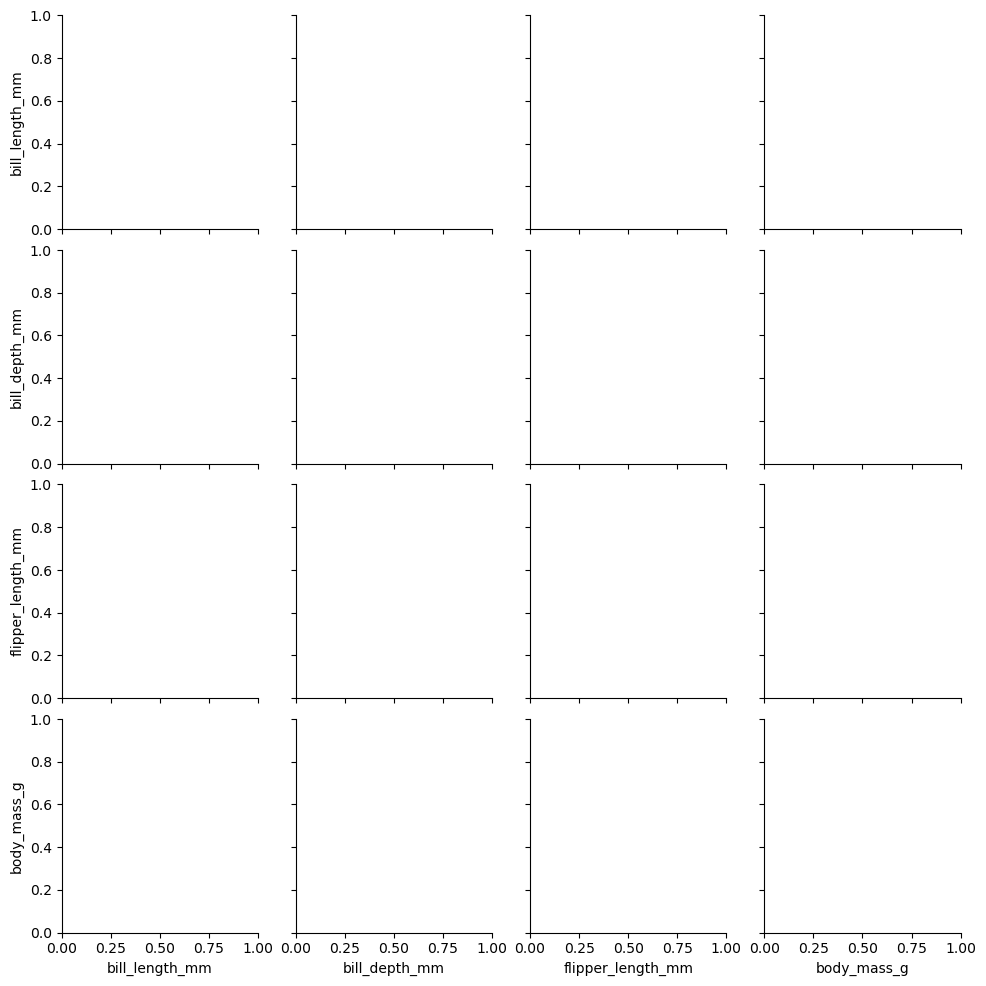

In [4]:
g = sns.PairGrid(pinguinos,
                hue="species");

Este bloque de código crea un `PairGrid()` personalizado que nos va a permitir mostrar la relación entre pares de variables del dataset de pingüinos, y que va a diferenciar los datos por especie.

Cada gráfico (que por ahora están vacíos) tiene la misión de mostrar una variable diferente en el eje **x** y el eje **y** para cada par de variables, permitiendo explorar cómo se relacionan entre sí.

Como habrás observado, esta vez he guardado el gráfico en una variable (`g`). El motivo por el que lo hice así, es porque más adelante voy a agregar detalles a este gráfico, y si lo tengo en una variable es más fácil invocarlo para agregar esos detalles.

Tengamos en cuenta que en realidad aquí vamos a tener gráficos duplicados. Por ejemplo, en la esquina superior derecha se va a formar un gráfico que va a comparar el largo de las aletas con la masa corporal, pero ese gráfico también se va a generar en la esquina inferior izquierda, donde también se juntan esas variables (pero con el eje cambiado). Entonces algo que podemos hacer aquí es incluir en `PairGrid()` el atributo `corner=True`, para que solamente se muestren los gráficos de la esquina inferior.

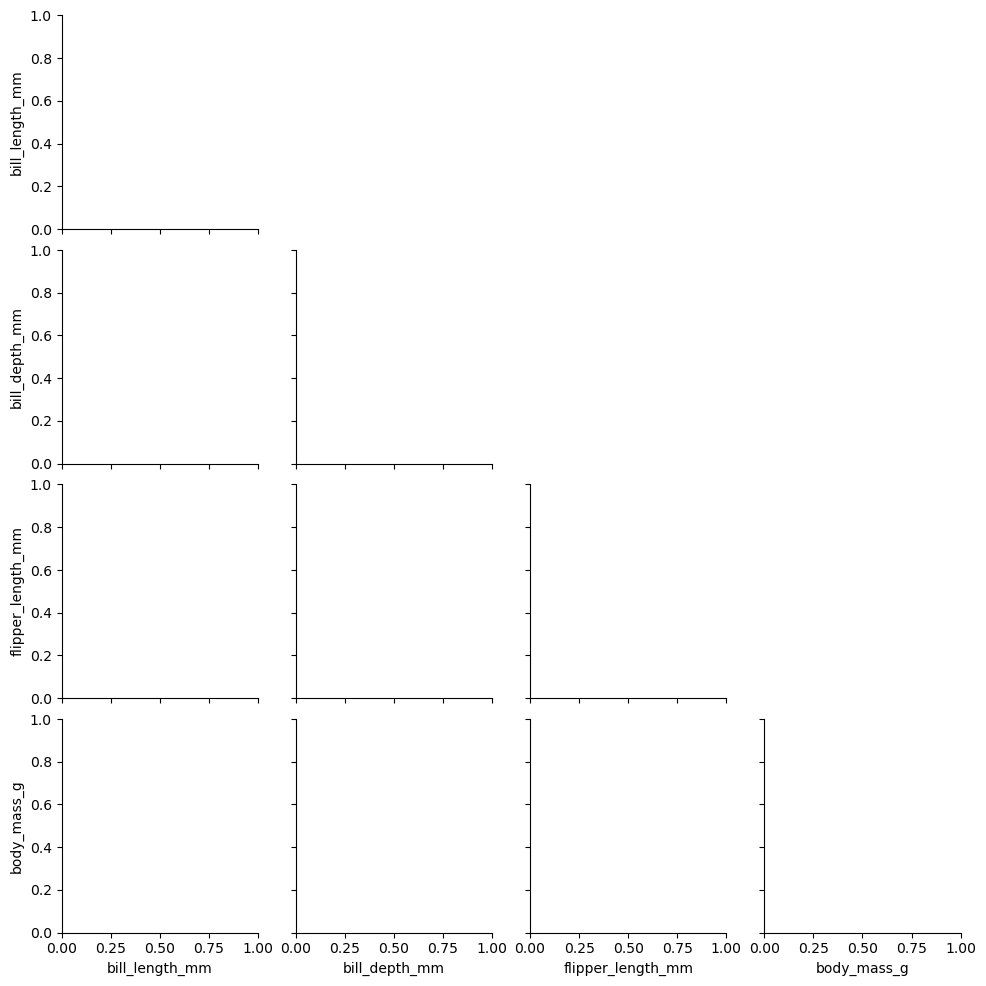

In [5]:
g = sns.PairGrid(pinguinos,
                hue="species",
                corner=True);

¿Cómo sabía yo que se podía usar ese parámetro? Bueno, supongo que ya no necesitas que te explique que cuento con `type()`, `help()` y `dir()` para conocer todas las funcionalidades que dispongo para caulquier tipo de situación en que me encuentro. En esta lección me vas a ver agregando parámetros nuevos todo el tiempo, y la explicación siempre es "**type**, **dir**, **help**".

Como te dije, `PairGrid()` es una función de **nivel inferior**, y esto no significa que sea inferior a las demás (todo lo contrario), sino que su construcción requiere más desarrollo y especificación de nuestra parte. Por eso, hasta aquí solamente he creado la base, y voy a ir agregando elementos para mostrarte cómo podemos *aggiornar* nuestros gráficos de un modo muy personalizado.


### Añadir KDE plots a la parte inferior
Ahora voy a replicar lo que hice antes (solo para que te queden expuestos todos los pasos en este cuaderno), y vamos a darle contenido a estos recuadros, comenzando por la parte inferior a través de la función `map_lower()`, que asigna gráficos a la parte inferior de la matriz, es decir a los gráficos **debajo de la diagonal principal**.

C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contou

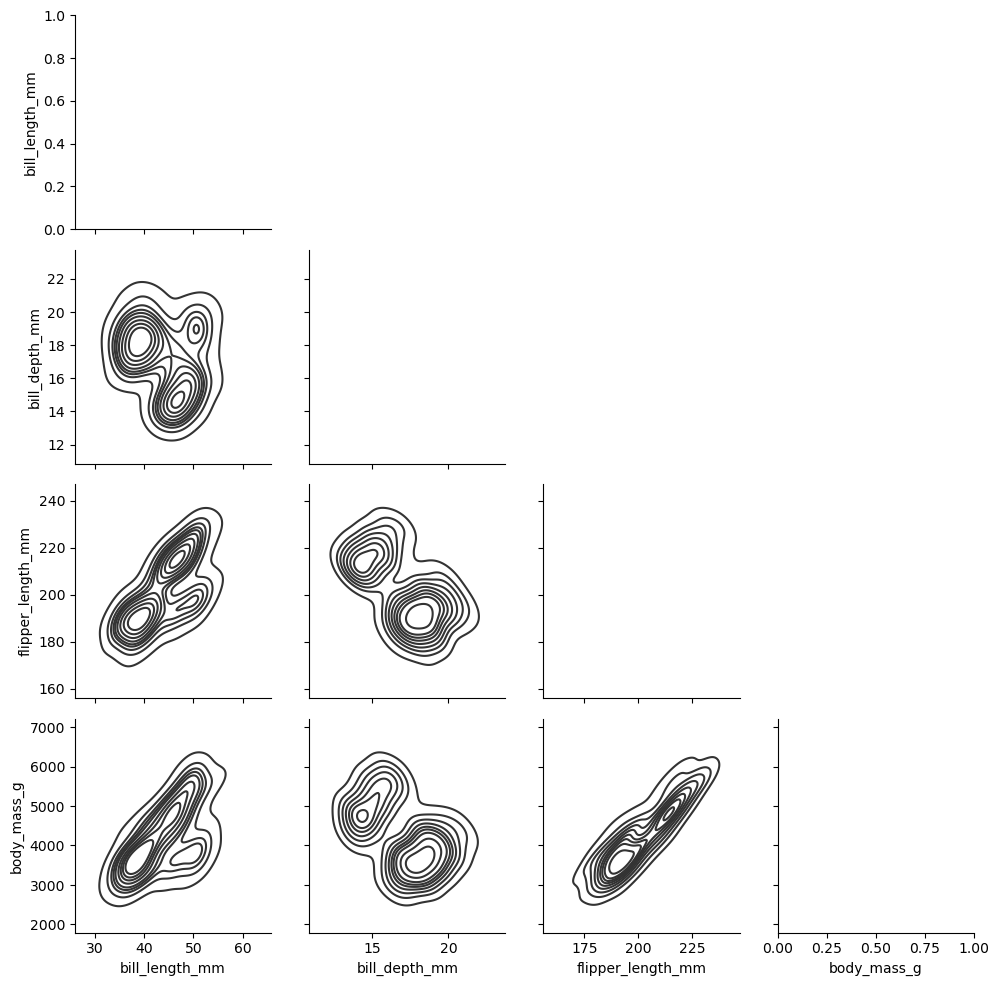

In [6]:
g = sns.PairGrid(pinguinos,
                hue="species",
                corner=True)
g.map_lower(sns.kdeplot,
           hue=None,
           level=5,
           color=".2");

Ahora quiero explicarte qué ha hecho cada uno de los parámetros que hemos agregado:
* `sns.kdeplot`: Hasta ahora te había enseñado a usar `displot(kind="kde")` para crear gráficos **kde**. Pero como `displot()` es una función de **alto nivel**, no la podemos llamar dentro de `PairGrid()` que es una función de **bajo nivel**. Por esa razón aquí los nombres que usaremos serán directamente los de los tipos de gráficos (como `kdeplot`, `barplot`, `scatterplot`, etc.). En este caso con `kdeplot` estoy pidiendo que en los recuadros de la esquina inferior se dibujen **gráficos de estimación de densidad kernel**, que muestren la distribución de las dos variables que les toquen a cada uno.
* `hue=None`: Este argumento anula el coloreado por especie solo para esta capa de gráfico, haciendo que el `kdeplot` se dibuje en un único color.
* `levels=5`: Especifica el número de niveles de contorno para el gráfico `kde`, definiendo cuántas capas se deben dibujar.
* `color=".2"`: Define el color de los gráficos `kde`, utilizando un tono de gris especificado como un valor de color.

El resultado es que se han generado gráficos en la parte inferior debajo de la diagonal principal (que aún está vacía), y en esos gráficos podemos ver unos `kde` sin color por ahora, representando la **distribución de las variables** que se cruzan en cada gráfico.


### Añadir gráficos de dispersión a la parte inferior
Para darle más vida y significado a esos mismos gráficos, vamos a añadir **gráficos de dispersión** en esos mismos recuadros, volviendo a usar `map_lower()`, pero esta vez con gráficos `scatterplot`.

C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contou

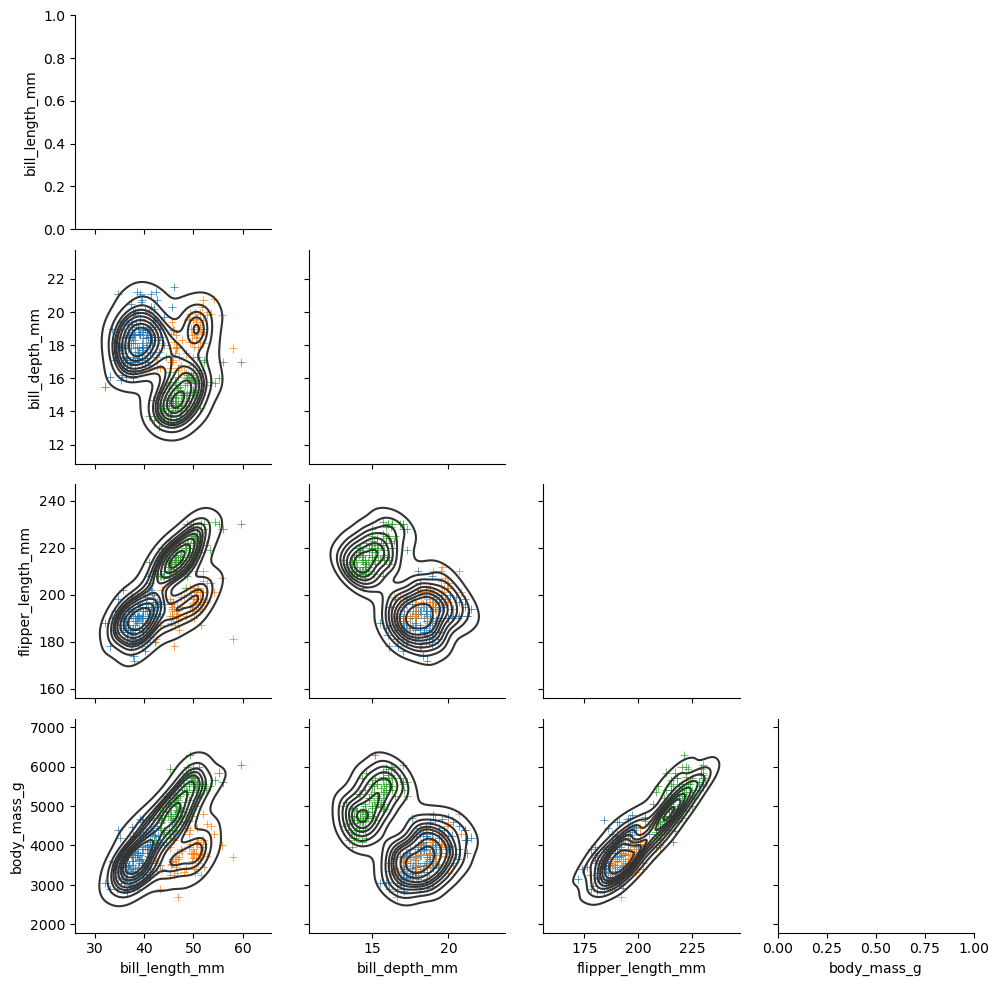

In [7]:
g = sns.PairGrid(pinguinos,
                hue="species",
                corner=True)
g.map_lower(sns.kdeplot,
           hue=None,
           level=5,
           color=".2")
g.map_lower(sns.scatterplot,
           marker="+");

Nuevamente, expliquemos cada uno de estos parámetros:
* `sns.scatterplot`: Otra vez, en vez de usar `relplot(kind="scatter")` como hicimos antes, dentro de una función de **bajo nivel** usamos directamente `scaterrplot`.
* `marker="+"`: Cambia la forma de los marcadores en el gráfico de dispersión a cruces (+), haciendo que los puntos sean fáciles de distinguir.

El resultado ha sido que ahora vemos que sobre los mismos espacios que los `kdeplot`, se añaden **gráficos de dispersión**, que muestran puntos individuales representando las observaciones en el DataFrame.


### Añadir histogramas a la diagonal
Ahora que la mitad inferior ya se ve bastante bien, vamos a agregar gráficos a los **recuadros de la diagonal**, con la función `map_diag()`.

C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contou

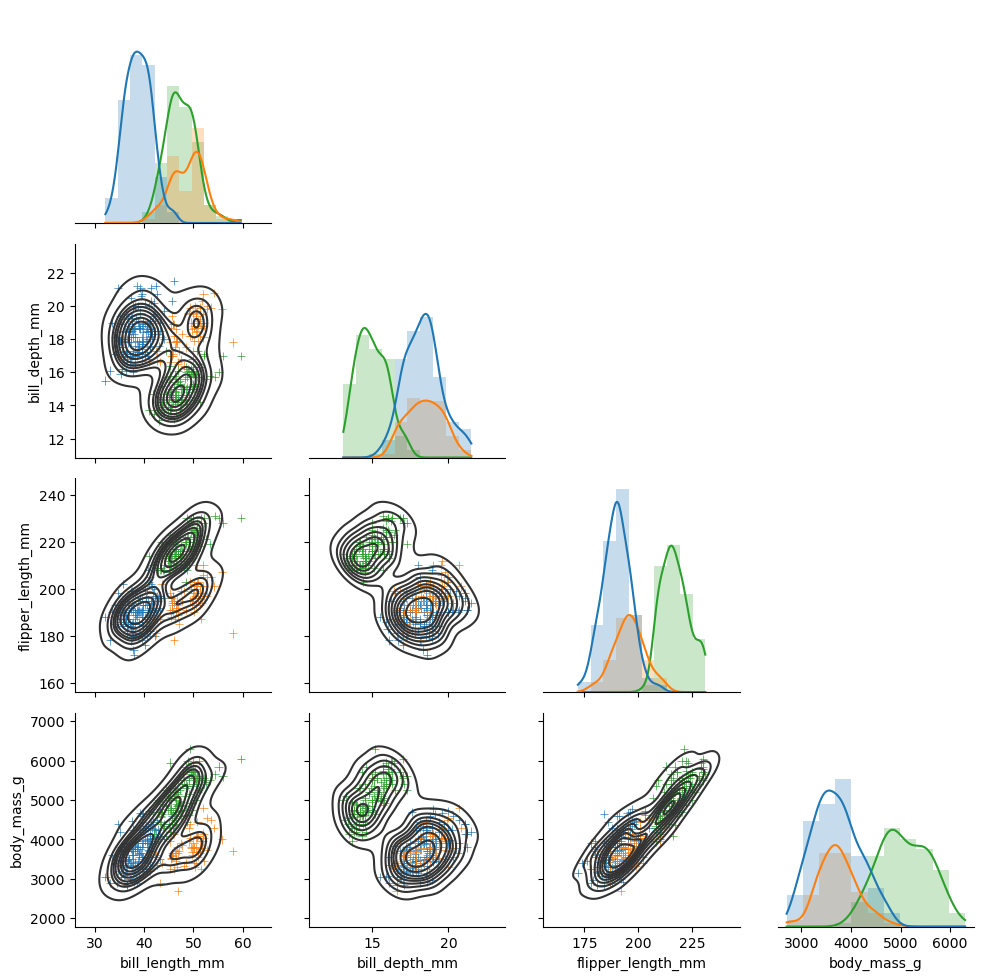

In [9]:
g = sns.PairGrid(pinguinos,
                hue="species",
                corner=True)
g.map_lower(sns.kdeplot,
           hue=None,
           level=5,
           color=".2")
g.map_lower(sns.scatterplot,
           marker="+")
g.map_diag(sns.histplot,
          element="step",
          linewidth=0,
          kde=True);

Veamos sus parámetros en detalle:
* `sns.histplot`: Es el nombre de la versión de **nivel inferior** para `displot(kind="hist")`, que como recordarás, se utiliza para dibujar un **histograma**, que muestra cómo se distribuyen los valores de una variable.
* `element="step"`: Crea un **histograma** con un estilo de línea de paso, sin relleno.
* `linewidth=0`: Establece el **ancho de línea** de los bordes de las barras del histograma a `0`, eliminando efectivamente el borde.
* `kde=True`: Añade una **línea de `kde`** sobre el histograma para mostrar la **distribución suavizada**.

El resultado es que ahora la diagonal del `PairGrid()` cuenta con bonitos histogramas de las variables superpuestas y unas líneas `kde` que ayudan a visualizar su distribución.


### Añadir la leyenda
Y ahora que nuestro gráfico estaría completo, vamos a ver qué podemos seguir utilizando en nuestra variable `g` para añadir otros detalles, como por ejemplo una **leyenda**:

C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contou

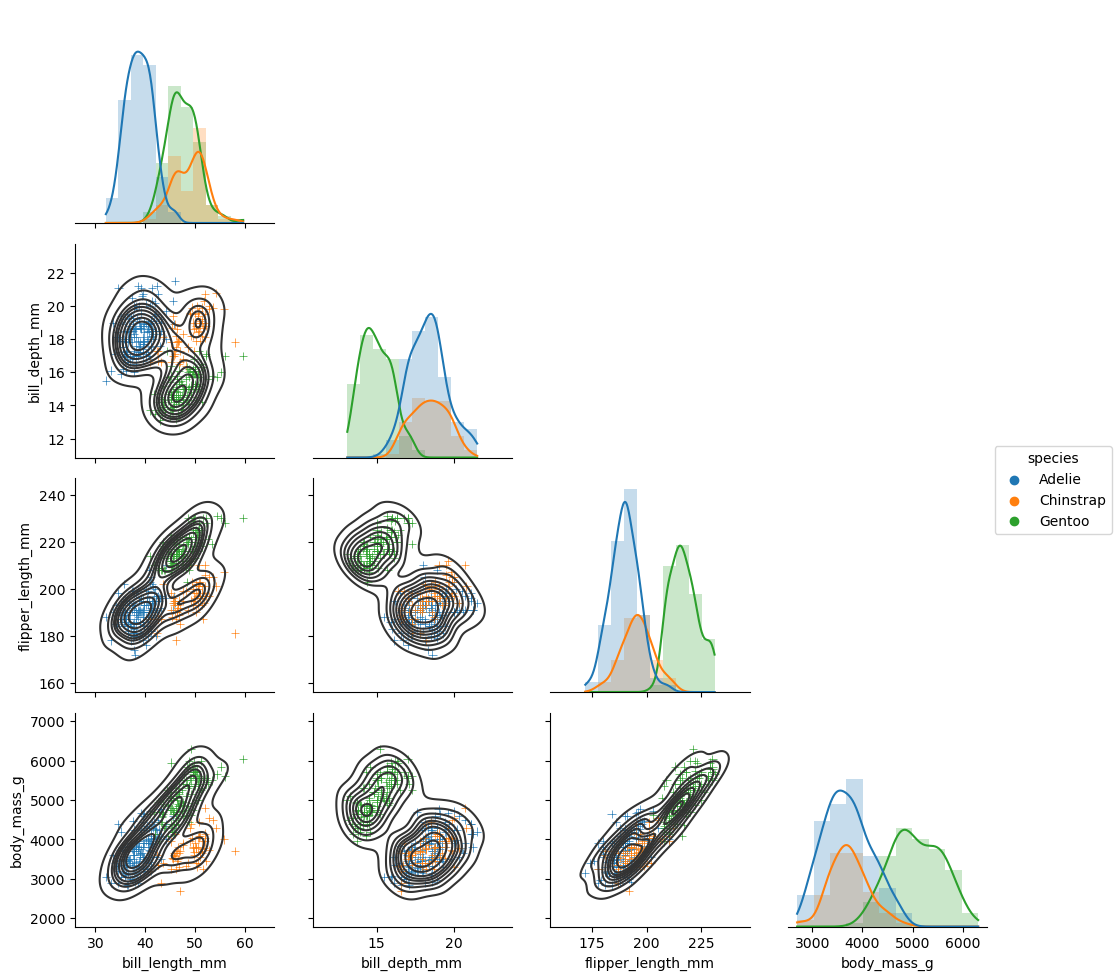

In [10]:
g = sns.PairGrid(pinguinos,
                hue="species",
                corner=True)
g.map_lower(sns.kdeplot,
           hue=None,
           level=5,
           color=".2")
g.map_lower(sns.scatterplot,
           marker="+")
g.map_diag(sns.histplot,
          element="step",
          linewidth=0,
          kde=True)
g.add_legend(frameon=True);

Los elementos que he incorporado aquí son:
* `add_legend`: Añade una leyenda al `PairGrid()` para identificar los diferentes grupos representados por colores (en este caso, las especies de pingüinos).
* `frameon=True`: Asegura que la leyenda tenga un marco (frame).

El resultado que vemos en el gráfico es que ahora se ha agregado la **leyenda con las referencias**.

Pero la verdad es que no me gusta dónde se ha ubicado esa leyenda. ¿acaso puedo modificar su ubicación? Por supuesto que sí. Esa es la ventaja de usar funciones de bajo nivel: que todo es mucho más personalizable.

C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contour_func(
C:\Users\Federico\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'level'
  cset = contou

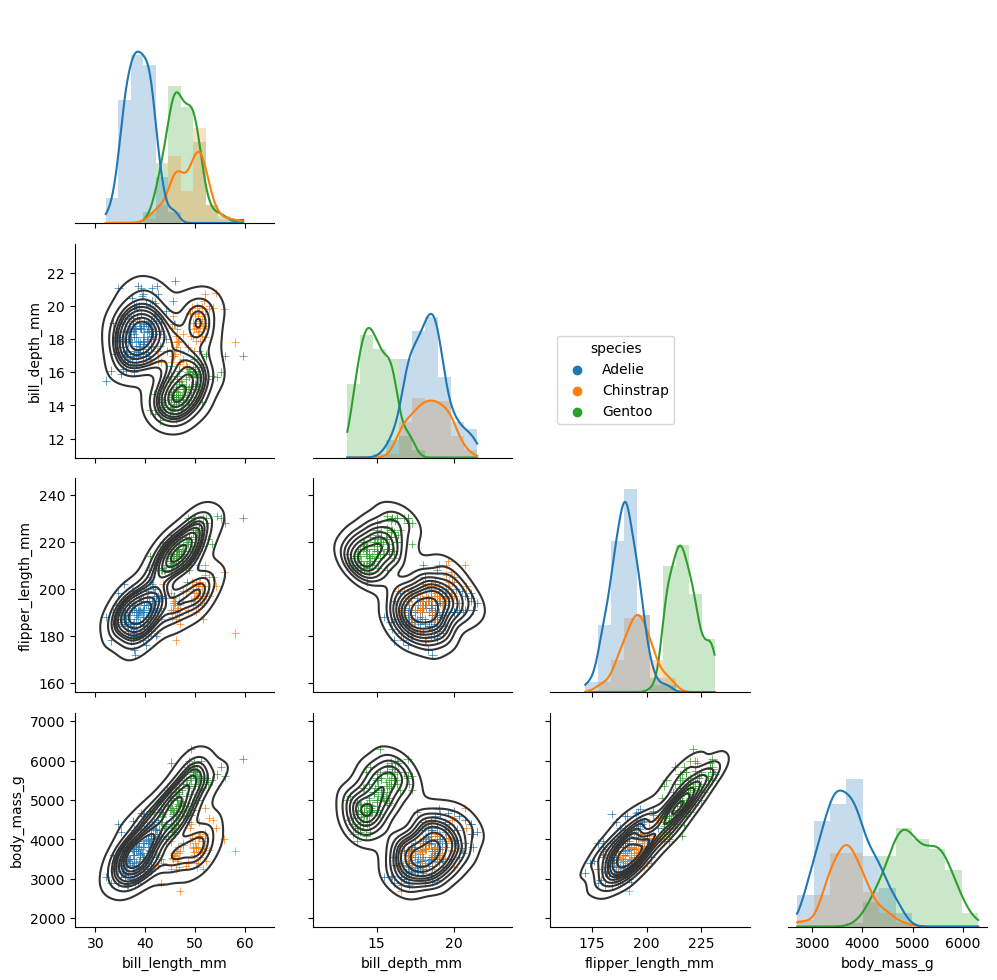

In [11]:
g = sns.PairGrid(pinguinos,
                hue="species",
                corner=True)
g.map_lower(sns.kdeplot,
           hue=None,
           level=5,
           color=".2")
g.map_lower(sns.scatterplot,
           marker="+")
g.map_diag(sns.histplot,
          element="step",
          linewidth=0,
          kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6));

Lo que hice en el último bloque de código fue agregar:
* `legend.set_bbox_to_anchor()`: Ajusta la posición de la caja de la leyenda en el gráfico.
* `(.61, .6)`: Especifica las coordenadas relativas para la posición de la leyenda, ayudando a asegurar que la leyenda no obstruya los gráficos.

Y luego de tanto trabajo, tenemos un código que crea una matriz detallada de gráficos que exploran las relaciones entre las variables del conjunto de datos, y que amplía por mil nuestra capacidad de mostrar la información exactamente como queremos.